In [38]:
## 1. Setup & Library Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os # To check for file existence and save outputs

# Set plotting style
sns.set_style("whitegrid")

In [39]:
## 2. Load the Dataset

try:
    # IMPORTANT: Update the filename if necessary
    file_path = 'ball_by_ball_it20.csv'
    df = pd.read_csv(file_path)
    
    # Initial data inspection and cleanup (as per the original function)
    print(f"Dataset '{file_path}' loaded successfully. Shape: {df.shape}")
    
    # Drop redundant column 'Unnamed: 0'
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
        print("Column 'Unnamed: 0' dropped.")
    else:
        print("Column 'Unnamed: 0' not found, skipping drop.")
        
except FileNotFoundError:
    print(f"ERROR: Dataset '{file_path}' not found. Please ensure the file is in the correct directory.")
    df = None

# Display the first few rows of the cleaned data
if df is not None:
    display(df.head())
    

Dataset 'ball_by_ball_it20.csv' loaded successfully. Shape: (425119, 35)
Column 'Unnamed: 0' dropped.


,Match ID,Date,Venue,Bat First,Bat Second,Innings,Over,Ball,Batter,Non Striker,...,Winner,Chased Successfully,Total Batter Runs,Total Non Striker Runs,Batter Balls Faced,Non Striker Balls Faced,Player Out Runs,Player Out Balls Faced,Bowler Runs Conceded,Valid Ball
0,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,1,BA King,KR Mayers,...,South Africa,1,1,0,1,0,NaN,NaN,1,1
1,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,2,KR Mayers,BA King,...,South Africa,1,1,1,1,1,NaN,NaN,1,1
2,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,3,BA King,KR Mayers,...,South Africa,1,0,1,0,1,1.0,2.0,0,1
3,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,4,J Charles,KR Mayers,...,South Africa,1,0,1,1,1,NaN,NaN,0,1
4,1339605,2023-03-26,SuperSport Park,West Indies,South Africa,1,1,5,J Charles,KR Mayers,...,South Africa,1,4,1,2,1,NaN,NaN,4,1


In [42]:
## 3. Data Overview: Types and Unique Values

# 9. Data Types
print("--- Data Types ---")
display(df.dtypes.to_frame(name='Data Type'))

# 10. Unique Value Counts
print("\n--- Unique Value Counts ---")
# Only show columns with < 50 unique values (for readability)
unique_counts = df.nunique().sort_values(ascending=False)
display(unique_counts.to_frame(name='Unique Count').head(15))

--- Data Types ---


,Data Type
Match ID,int64
Date,object
Venue,object
Bat First,object
Bat Second,object
Innings,int64
Over,int64
Ball,int64
Batter,object
Non Striker,object



--- Unique Value Counts ---


,Unique Count
Batter,2899
Non Striker,2854
Player Out,2683
Bowler,2156
Match ID,1842
Date,1115
Runs to Get,295
Innings Runs,267
Target Score,212
Venue,183


In [44]:
## 4. Summary Statistics for Numerical Features

print("1. Summary Statistics for Key Match/Ball Features:")
summary_stats = df[['Innings Runs', 'Innings Wickets', 'Target Score', 'Runs to Get', 'Balls Remaining', 'Runs From Ball']].describe().T
display(summary_stats)

1. Summary Statistics for Key Match/Ball Features:


,count,mean,std,min,25%,50%,75%,max
Innings Runs,425119.0,68.763113,46.234421,0.0,31.0,63.0,101.0,278.0
Innings Wickets,425119.0,2.748880,2.283944,0.0,1.0,2.0,4.0,11.0
Target Score,425119.0,153.296171,38.138024,11.0,129.0,154.0,179.0,279.0
Runs to Get,200304.0,90.197060,49.981172,-39.0,51.0,88.0,126.0,273.0
Balls Remaining,425119.0,62.797443,33.835073,-1.0,34.0,64.0,92.0,120.0
Runs From Ball,425119.0,1.214634,1.536030,0.0,0.0,1.0,1.0,8.0


2. Successful Chase Distribution (0=Failed, 1=Succeeded):


,count
Chased Successfully,
1,928
0,914


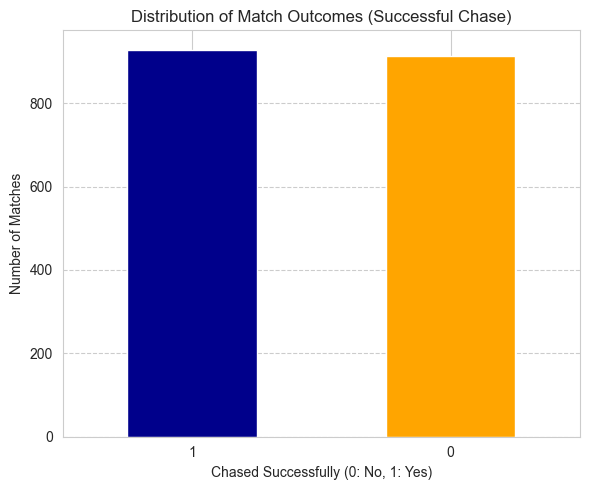

Bar plot for chase outcome displayed.


In [53]:
## 5. Target Variable Distribution: Successful Chase

# Filter to one row per match to analyze the final outcome
match_outcomes = df.drop_duplicates(subset=['Match ID'])
successful_chase_count = match_outcomes['Chased Successfully'].value_counts()

print("2. Successful Chase Distribution (0=Failed, 1=Succeeded):")
display(successful_chase_count.to_frame())

# Visualization
plt.figure(figsize=(6, 5))
successful_chase_count.plot(kind='bar', color=['darkblue', 'orange'])
plt.title('Distribution of Match Outcomes (Successful Chase)')
plt.xlabel('Chased Successfully (0: No, 1: Yes)')
plt.ylabel('Number of Matches')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('eda_chase_outcome.png')
plt.show()
print("Bar plot for chase outcome displayed.")

3. Top 10 Venues by Average First Innings Score:


,Average Score
Venue,
Holkar Cricket Stadium,209.666667
Punjab Cricket Association Stadium,206.000000
Headingley,200.000000
Bay Oval,198.375000
Rajiv Gandhi International Stadium,196.500000
Gucherre Cricket Ground,195.000000
Mangaung Oval,195.000000
De Beers Diamond Oval,194.000000
Jade Stadium,193.000000


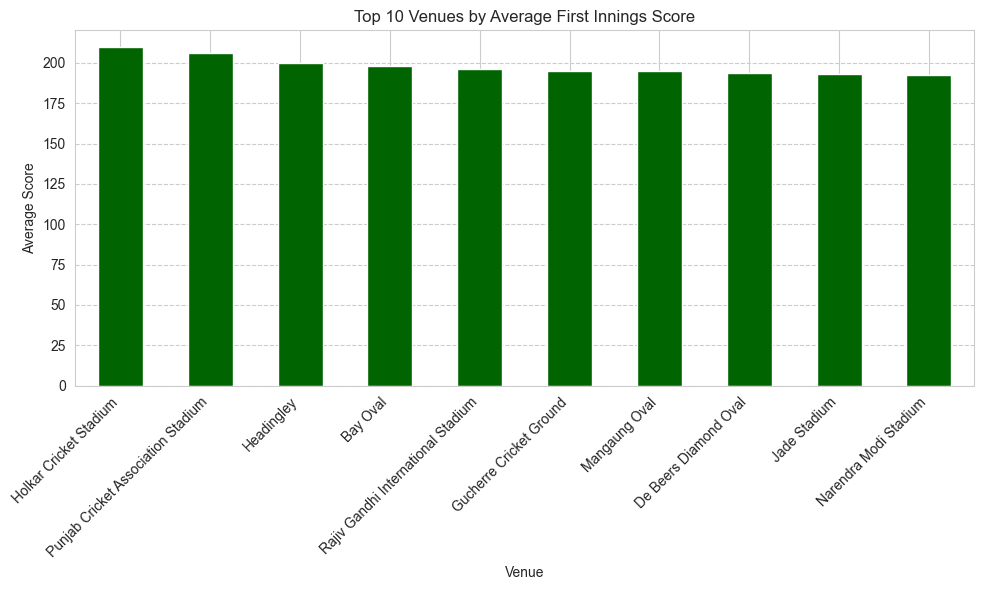

Bar plot for venue average score displayed.


In [54]:
## 6. Venue Analysis: Average First Innings Score

# 1. Get the final score for each first innings
first_innings_scores = df[df['Innings'] == 1].groupby('Match ID').agg({
    'Venue': 'first',
    'Innings Runs': 'max'
}).rename(columns={'Innings Runs': 'First Innings Score'})

# 2. Group by Venue and calculate the mean score
venue_avg_score = first_innings_scores.groupby('Venue')['First Innings Score'].mean().sort_values(ascending=False).head(10)

print("3. Top 10 Venues by Average First Innings Score:")
display(venue_avg_score.to_frame(name='Average Score'))

# Visualization
plt.figure(figsize=(10, 6))
venue_avg_score.plot(kind='bar', color='darkgreen')
plt.title('Top 10 Venues by Average First Innings Score')
plt.xlabel('Venue')
plt.ylabel('Average Score')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('eda_venue_avg_score.png')
plt.show()
print("Bar plot for venue average score displayed.")

4. Distribution of Target Scores:


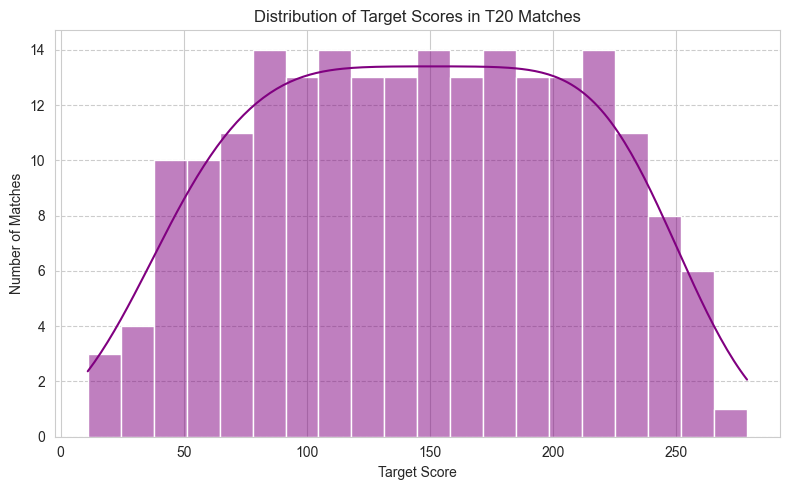

Target Score distribution histogram displayed.


In [55]:
## 7. Feature Distribution: Target Score

print("4. Distribution of Target Scores:")

plt.figure(figsize=(8, 5))
# Filter for unique target scores from the 2nd innings (where Target Score > 0)
valid_targets = df[(df['Target Score'] > 0) & (df['Innings'] == 2)]['Target Score'].drop_duplicates()
sns.histplot(valid_targets, bins=20, kde=True, color='purple')
plt.title('Distribution of Target Scores in T20 Matches')
plt.xlabel('Target Score')
plt.ylabel('Number of Matches')
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('eda_target_score_distribution.png')
plt.show()
print("Target Score distribution histogram displayed.")

5. Correlation Matrix of Key 2nd Innings Features:


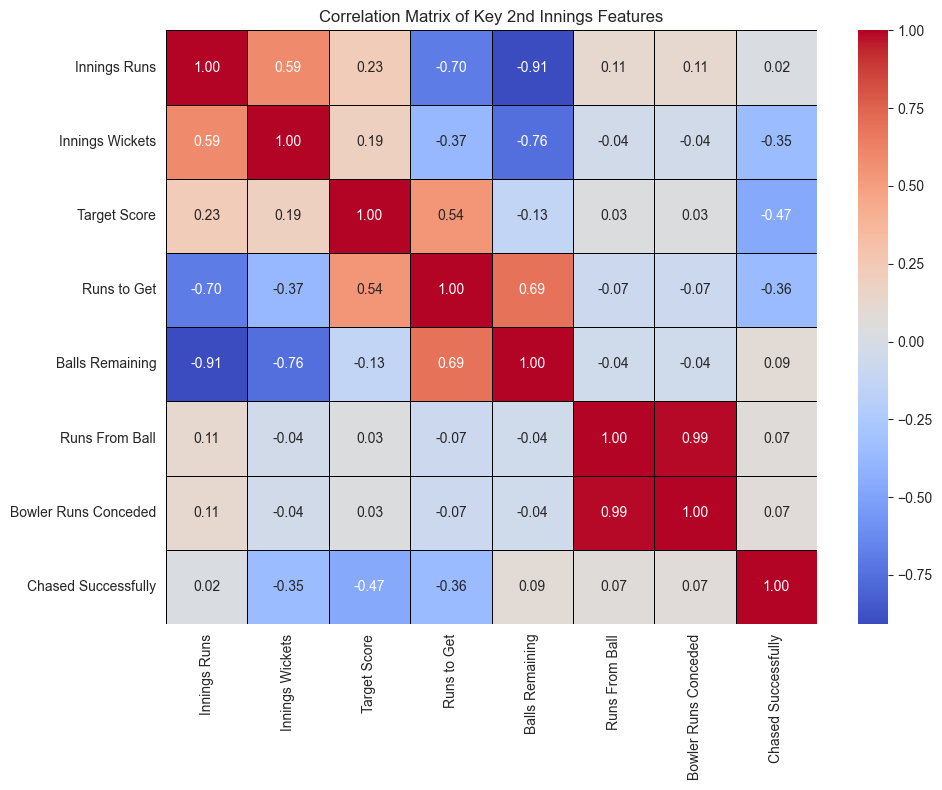

Correlation heatmap displayed.


In [56]:
## 8. Correlation Analysis: 2nd Innings Features

print("5. Correlation Matrix of Key 2nd Innings Features:")

# Isolate 2nd innings data as the 'Chased Successfully' column is most relevant here.
df_2nd_innings = df[df['Innings'] == 2].copy()

correlation_features = [
    'Innings Runs', 
    'Innings Wickets', 
    'Target Score', 
    'Runs to Get', 
    'Balls Remaining', 
    'Runs From Ball',
    'Bowler Runs Conceded',
    'Chased Successfully' # The target variable
]

corr_matrix = df_2nd_innings[correlation_features].corr()

# Visualization
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, linecolor='black')
plt.title('Correlation Matrix of Key 2nd Innings Features')
plt.tight_layout()
plt.savefig('eda_correlation_heatmap.png')
plt.show()
print("Correlation heatmap displayed.")

6. Win Probability for Chasing Team vs. Overs Completed:


C:\Users\User\AppData\Local\Temp\ipykernel_26468\835346223.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  win_prob_over = df_2nd_innings.groupby(pd.cut(df_2nd_innings['Overs Completed'], bins=over_bins, include_lowest=True))['Chased Successfully'].mean() * 100


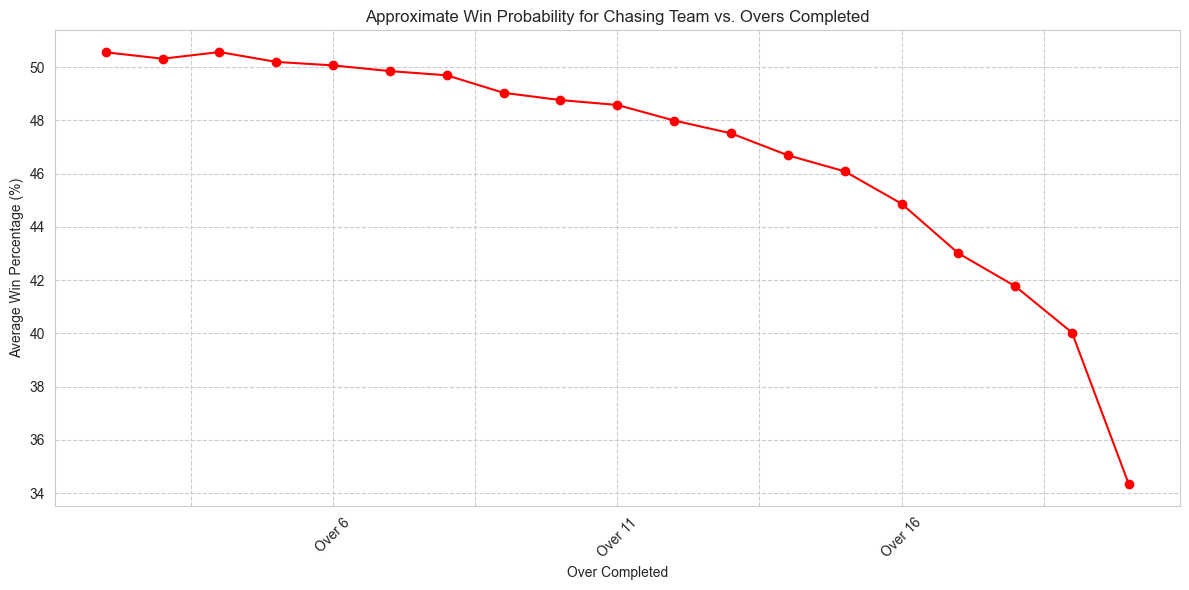

Win Probability trend line plot displayed.


In [61]:
## 9. Trend Analysis: Approximate Win Probability

print("6. Win Probability for Chasing Team vs. Overs Completed:")

# Calculate Overs Completed for 2nd innings
df_2nd_innings['Overs Completed'] = df_2nd_innings['Over'] + (df_2nd_innings['Ball'] / 6)

# Group by one-over bins and calculate the average success rate (mean of 'Chased Successfully')
over_bins = np.arange(0, 21, 1)
win_prob_over = df_2nd_innings.groupby(pd.cut(df_2nd_innings['Overs Completed'], bins=over_bins, include_lowest=True))['Chased Successfully'].mean() * 100
win_prob_over.index = [f'Over {int(interval.right)}' for interval in win_prob_over.index]

# Visualization
plt.figure(figsize=(12, 6))
win_prob_over.plot(kind='line', marker='o', color='red')
plt.title('Approximate Win Probability for Chasing Team vs. Overs Completed')
plt.xlabel('Over Completed')
plt.ylabel('Average Win Percentage (%)')
plt.xticks(rotation=45)
plt.grid(axis='both', linestyle='--')
plt.tight_layout()
plt.savefig('eda_win_prob_trend.png')
plt.show()
print("Win Probability trend line plot displayed.")

7. Total Wickets Fallen Per Over Across All Matches:


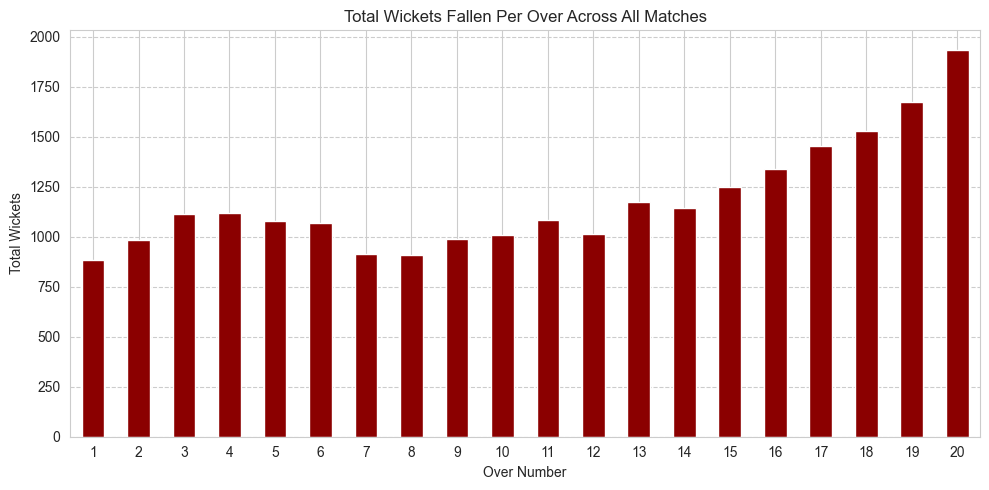

Wickets per over bar chart displayed.


In [62]:
## 10. Grouped Aggregation: Wickets Fallen Per Over

print("7. Total Wickets Fallen Per Over Across All Matches:")

# Filter for rows where a wicket fell and count them by over
wickets_per_over = df[df['Wicket'] == 1].groupby('Over')['Wicket'].count()

# Visualization
plt.figure(figsize=(10, 5))
wickets_per_over.plot(kind='bar', color='darkred')
plt.title('Total Wickets Fallen Per Over Across All Matches')
plt.xlabel('Over Number')
plt.ylabel('Total Wickets')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.savefig('eda_wickets_per_over.png')
plt.show()
print("Wickets per over bar chart displayed.")

8. Box Plot for Runs From Ball:


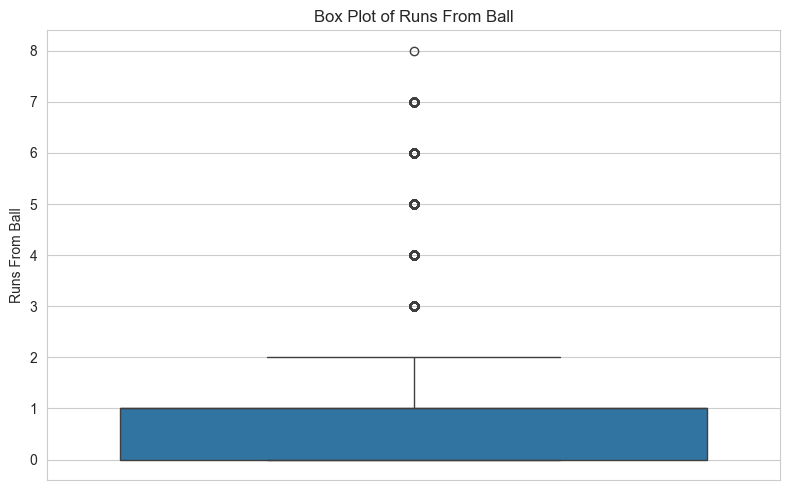

Box plot displayed.


In [59]:
## 11. Outlier Detection: Runs From Ball

print("8. Box Plot for Runs From Ball:")

plt.figure(figsize=(8, 5))
sns.boxplot(y=df['Runs From Ball'])
plt.title('Box Plot of Runs From Ball')
plt.ylabel('Runs From Ball')
plt.tight_layout()
plt.savefig('eda_runs_from_ball_boxplot.png')
plt.show()
print("Box plot displayed.")

In [60]:
## 12. Final Thoughts and Summary

print("--- EDA Complete ---")
print("The analysis covered summary statistics, match outcomes, venue performance, feature distributions, correlation, and match trends.")
print("The following plots were generated and displayed in the notebook:")
print("* Match Outcome (Successful Chase) Distribution")
print("* Top 10 Venues by Average First Innings Score")
print("* Target Score Distribution")
print("* Correlation Matrix Heatmap")
print("* Approximate Win Probability vs. Overs Completed")
print("* Total Wickets Fallen Per Over")
print("* Box Plot of Runs From Ball")

--- EDA Complete ---
The analysis covered summary statistics, match outcomes, venue performance, feature distributions, correlation, and match trends.
The following plots were generated and displayed in the notebook:
* Match Outcome (Successful Chase) Distribution
* Top 10 Venues by Average First Innings Score
* Target Score Distribution
* Correlation Matrix Heatmap
* Approximate Win Probability vs. Overs Completed
* Total Wickets Fallen Per Over
* Box Plot of Runs From Ball
